# <center><u><font color='red'> Prédiction consommation d'énergie2</font></u></center>

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split
from functions import utils
import math
from sklearn.svm import SVR
from xgboost import XGBRegressor 
from functions.functions import *
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
pd.options.display.float_format = '{:,.4f}'.format


In [64]:
target_col='SiteEnergyUse(kBtu)'

In [65]:
df=pd.read_csv('data/cleaned_and_normalized.csv')


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 52 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NumberofBuildings                                965 non-null    float64
 1   NumberofFloors                                   965 non-null    float64
 2   PropertyGFABuilding(s)                           965 non-null    float64
 3   TotalGHGEmissions                                965 non-null    float64
 4   SiteEnergyUse(kBtu)                              965 non-null    float64
 5   ENERGYSTARScore                                  965 non-null    float64
 6   age                                              965 non-null    float64
 7   distance_from_center_ville                       965 non-null    float64
 8   natural_gas_percentage                           965 non-null    float64
 9   BuildingType_Campus             

In [67]:
df.head()

,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),TotalGHGEmissions,SiteEnergyUse(kBtu),ENERGYSTARScore,age,distance_from_center_ville,natural_gas_percentage,BuildingType_Campus,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,-0.0482,-0.1632,0.6895,9.1300,"1,310,236.6250",-0.0000,0.7957,-1.3423,-1.1535,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,-0.0482,0.5429,1.3396,157.7700,"4,145,920.5000",-0.0000,1.5674,0.0012,1.3348,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,-0.0482,1.2490,1.1647,215.0000,"6,668,568.5000",-1.4738,-1.2621,0.3195,0.8694,0.0000,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,-0.0482,-0.1632,2.0887,3.9300,"318,364.8125",-0.0000,-0.0081,0.2482,-0.7231,0.0000,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,-0.0482,-0.1632,0.2925,31.4700,"1,650,279.2500",1.5443,-1.1335,0.1028,-0.1851,0.0000,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [68]:
cols=['best_params','R2','rmse','model','time_elapsed']
df_result=pd.DataFrame(columns=cols)
df_result_with_energy_star_score=pd.DataFrame(columns=cols)

In [69]:
test_size=0.25
random_state=42
cv=5
scoring='r2'
feature_cols=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore']]

 
feature_cols_with_energy_star_score=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore']]

 

In [70]:
X_train,X_test,y_train,y_test=train_test_split(df[feature_cols],df[target_col],test_size=test_size,random_state=random_state)
X_train_with_energy_star_score=X_train[feature_cols_with_energy_star_score]
X_test_with_energy_star_score=X_test[feature_cols_with_energy_star_score]
train_y=y_train.values
test_y=y_test.values


## Partie 1 modèles linéaires

### 1 <u>Modèle linéaire simple</u>

#### 1-1 <u>Régression linéaire sans ENERGYSTARScore </u>

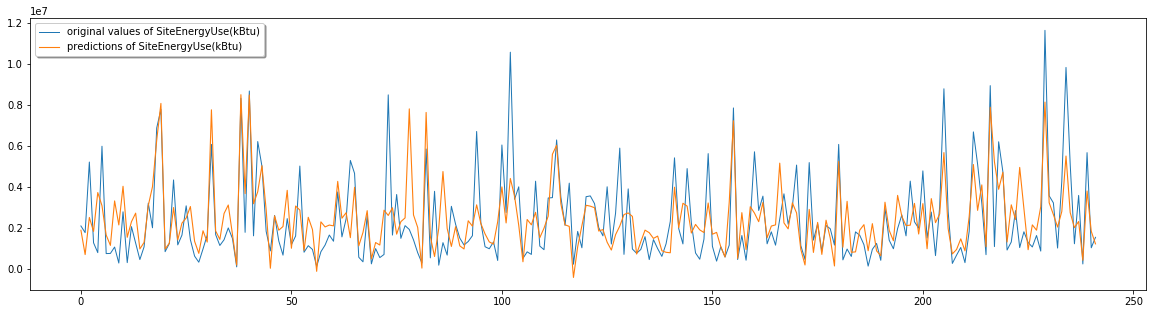

,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0031


In [71]:

train_x=X_train.values
test_x=X_test.values
 

result=utils.model_func(df,LinearRegression(),target_col,feature_cols,test_size,random_state,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
df_result

R2 assez élevé de 94%, l'émission de gaz naturel a un effet très significatif sur l'émission de co2

#### 1-2  <u>Régression linéaire avec ENERGYSTARScore </u>

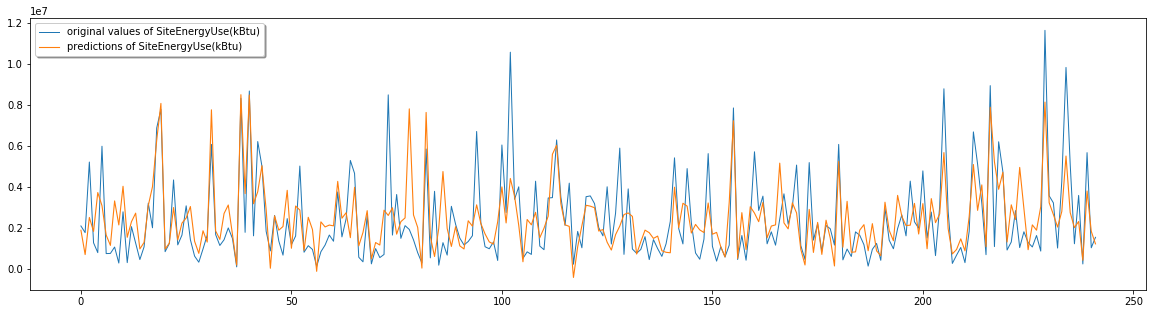

{'best_params': None, 'R2': 0.5028827675143802, 'rmse': 1509393.1622315578, 'model': 'LinearRegression', 'time_elapsed': 0.0067250150023028255}


In [72]:

train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 
result=utils.model_func(df,LinearRegression(),target_col,feature_cols_with_energy_star_score,test_size,random_state,train_x,test_x,train_y,test_y)

df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score
print(result)

avec un R2 de 93% 

### 2 <u>Régression de ridge</u>

#### 2-1 <u>Régression de ridge sans ENERGYSTARScore </u>

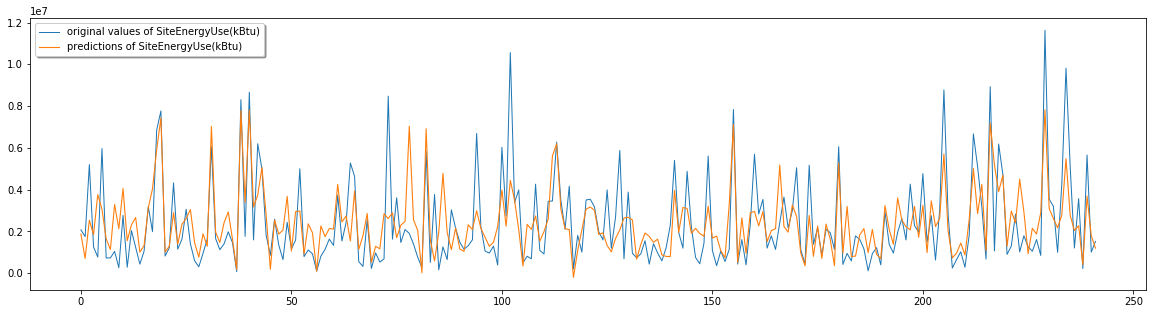

{'best_params': {'alpha': 2, 'fit_intercept': True, 'solver': 'saga'}, 'R2': 0.482120566862681, 'rmse': 1487589.4325857048, 'model': 'Ridge', 'time_elapsed': 2.861287862993777}


In [73]:

train_x=X_train_with_energy_star_score.values
test_x=X_test.values
 
param_grid = [{
  #  'alpha':np.arange(0.1,4.1,0.1),
      'alpha':[1,2,3,4],
    'fit_intercept':[True,False],
  
  'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}]



scoring = 'r2'
 
model = Ridge(random_state=random_state)
#ridge.best_params_,ridge.best_score_,rmse,model.__class__.__name__,elapsed
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)

#### 2-2 <u>Régression de ridge avec ENERGYSTARScore </u>

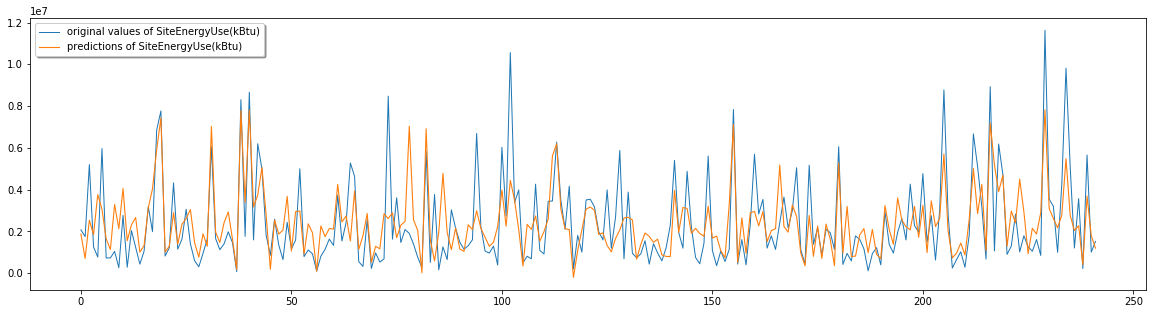

{'best_params': {'alpha': 2, 'fit_intercept': True, 'solver': 'saga'}, 'R2': 0.482120566862681, 'rmse': 1487589.4325857048, 'model': 'Ridge', 'time_elapsed': 2.2641054400010034}


,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0067
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.4821,"1,487,589.4326",Ridge,2.2641


In [74]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

 
param_grid = [{
    'alpha':[1,2,3],
    'fit_intercept':[True,False],
  
  'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}]

 
model = Ridge(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

### 3 <u>Régression de Lasso</u>

#### 3-1 <u>Régression de Lasso sans ENERGYSTARScore </u>

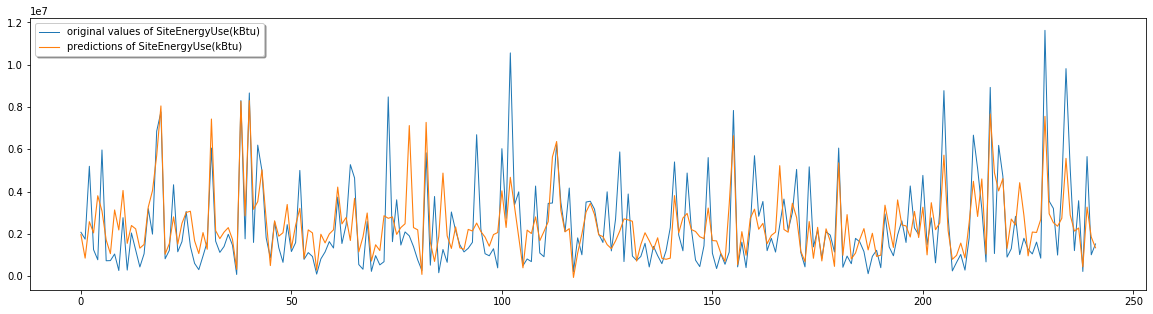

{'best_params': {'alpha': 7811, 'fit_intercept': True}, 'R2': 0.48907186360213617, 'rmse': 1478533.3738213633, 'model': 'Lasso', 'time_elapsed': 0.046484232996590436}


,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0031
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.4821,"1,487,589.4326",Ridge,2.8613
2,"{'alpha': 7811, 'fit_intercept': True}",0.4891,"1,478,533.3738",Lasso,0.0465


In [75]:
train_x=X_train.values
test_x=X_test.values

 
param_grid = [{
  #  'alpha':np.arange(1,10000,1),
      'alpha':[7811],
    'fit_intercept':[True,False],
  
  
}]


scoring = 'r2'
 
model = Lasso( random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)
df_result

#### 3-2 <u>Régression de Lasso avec ENERGYSTARScore </u>

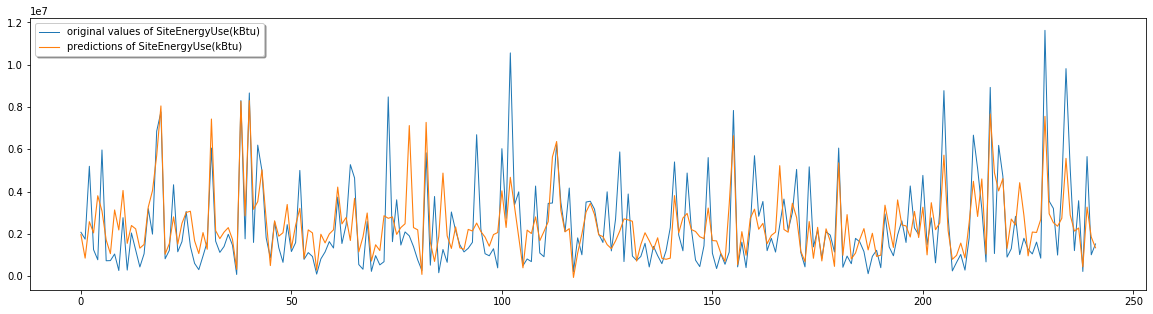

{'best_params': {'alpha': 7811, 'fit_intercept': True}, 'R2': 0.48907186360213617, 'rmse': 1478533.3738213633, 'model': 'Lasso', 'time_elapsed': 0.03851369605399668}


,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0067
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.4821,"1,487,589.4326",Ridge,2.2641
2,"{'alpha': 7811, 'fit_intercept': True}",0.4891,"1,478,533.3738",Lasso,0.0385


In [76]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

 
param_grid = [{
  #  'alpha':np.arange(1,10000,1),
      'alpha':[7811],
    'fit_intercept':[True,False],
  
  
}]


scoring = 'r2'
 
model = Lasso( random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

### 4 <u>Régression de ElasticNet</u>

#### 4-1 <u>Régression de ElasticNet sans ENERGYSTARScore </u>

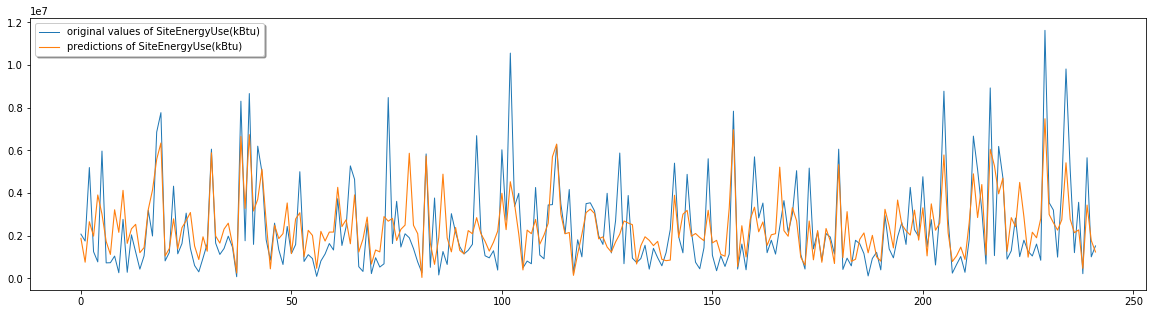

,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0031
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.4821,"1,487,589.4326",Ridge,2.8613
2,"{'alpha': 7811, 'fit_intercept': True}",0.4891,"1,478,533.3738",Lasso,0.0465
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.4748,"1,490,319.8859",ElasticNet,20.9918


In [77]:
train_x=X_train.values
test_x=X_test.values
 #param_grid = [{'alpha' : np.arange(0,0.2,0.001)}]
param_grid = [{"alpha": np.arange(0.01,1.01,0.01),  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": np.arange(0, 0.01, 0.001)}]#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge


 
model = ElasticNet( random_state=random_state,normalize=False)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result=df_result.append(result,ignore_index = True)
df_result

#### 4-2 <u>Régression de ElasticNet avec ENERGYSTARScore </u>

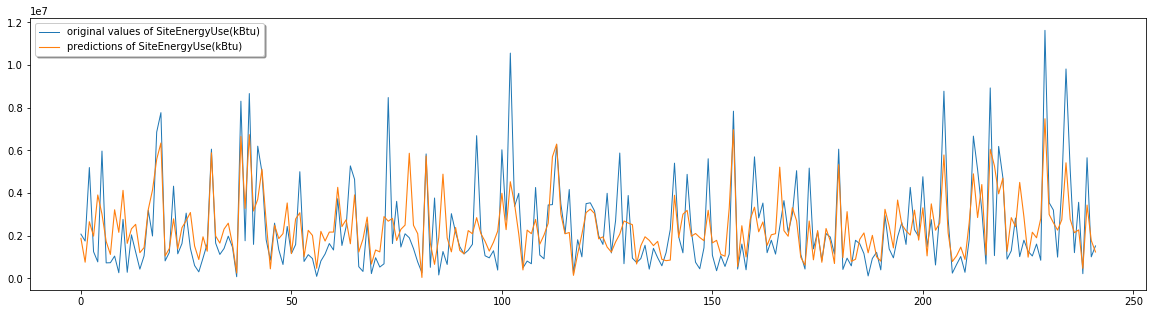

{'best_params': {'alpha': 0.01, 'l1_ratio': 0.009000000000000001}, 'R2': 0.47476829142134785, 'rmse': 1490319.8858899272, 'model': 'ElasticNet', 'time_elapsed': 22.17480479204096}


,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0067
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.4821,"1,487,589.4326",Ridge,2.2641
2,"{'alpha': 7811, 'fit_intercept': True}",0.4891,"1,478,533.3738",Lasso,0.0385
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.4748,"1,490,319.8859",ElasticNet,22.1748


In [78]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

param_grid = [{"alpha": np.arange(0.01,1.01,0.01),  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": np.arange(0, 0.01, 0.001)}]#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge

 
model = ElasticNet( random_state=random_state,normalize=False)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

Conclusion modèles linéaires: La régularisation Ridge avec le pramaètre alpha=1 reste le meilleur modèle, la prise en compte de ENERGYSTARScore comme variable explicative améliore les performance du modèle

## Partie 2 modèles non linéaires

### 1 <u>Random Forest</u>

#### 1-1 <u>Random Forest sans ENERGYSTARScore </u>

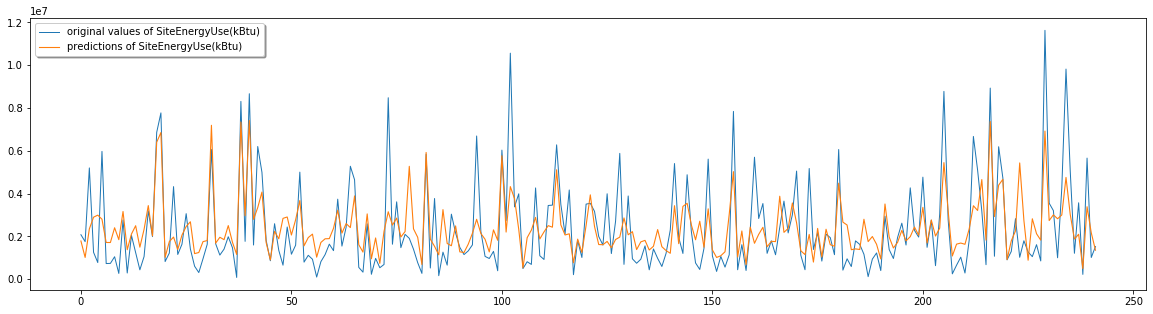

,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0031
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.4821,"1,487,589.4326",Ridge,2.8613
2,"{'alpha': 7811, 'fit_intercept': True}",0.4891,"1,478,533.3738",Lasso,0.0465
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.4748,"1,490,319.8859",ElasticNet,20.9918
4,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.4609,"1,454,179.5418",RandomForestRegressor,0.8867


In [79]:

train_x=X_train.values
test_x=X_test.values
 

'''
param_grid = {
'n_estimators':[5,20,50,100], # nombre d'arbres
'max_features':['auto', 'sqrt'], # nombre de variables tenu en compte pour la création de chaque arbre
'max_depth':np.arange(10,130,10), # nombre maximum de niveaux dans chaque arbre de décision 
'min_samples_split':[2, 6, 10], # nombre minimal d'observation avant séparation du noeud
'min_samples_leaf':[1, 3, 4], #nombre minimal d'observation pour créer une feuille
'bootstrap':[True, False] # méthode d'échantillonnage
}   
'''
 
## best params


param_grid={'bootstrap': [False],
  'max_depth': [20],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [10],
  'n_estimators':[ 100]}
 
model = RandomForestRegressor(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result


In [80]:
#df_result['best_params']
#df_result.iloc[34][['best_params']]
result                        

{'best_params': {'bootstrap': False,
  'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 100},
 'R2': 0.46090614183719014,
 'rmse': 1454179.5418473785,
 'model': 'RandomForestRegressor',
 'time_elapsed': 0.8867494640871882}

#### 1-2 <u>Random Forest avec ENERGYSTARScore </u>

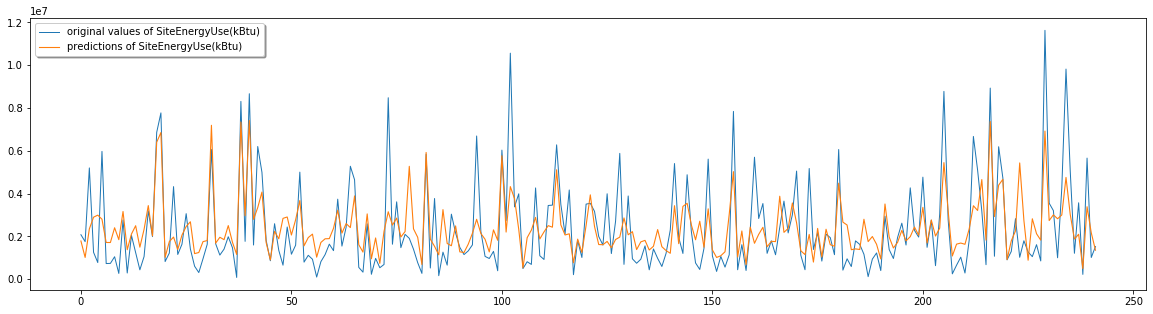

,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0067
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.4821,"1,487,589.4326",Ridge,2.2641
2,"{'alpha': 7811, 'fit_intercept': True}",0.4891,"1,478,533.3738",Lasso,0.0385
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.4748,"1,490,319.8859",ElasticNet,22.1748
4,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.4609,"1,454,179.5418",RandomForestRegressor,0.9227


In [81]:
 
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 

 


 
 
## best params
param_grid={'bootstrap': [False],
  'max_depth': [20],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [10],
  'n_estimators':[ 100]}
 
model = RandomForestRegressor(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score
 

In [82]:
df_result_with_energy_star_score.sort_values(by='R2',ascending=False)

,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0067
2,"{'alpha': 7811, 'fit_intercept': True}",0.4891,"1,478,533.3738",Lasso,0.0385
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.4821,"1,487,589.4326",Ridge,2.2641
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.4748,"1,490,319.8859",ElasticNet,22.1748
4,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.4609,"1,454,179.5418",RandomForestRegressor,0.9227


In [83]:


df_result.sort_values(by='R2',ascending=False)

,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0031
2,"{'alpha': 7811, 'fit_intercept': True}",0.4891,"1,478,533.3738",Lasso,0.0465
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.4821,"1,487,589.4326",Ridge,2.8613
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.4748,"1,490,319.8859",ElasticNet,20.9918
4,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.4609,"1,454,179.5418",RandomForestRegressor,0.8867


  ### 2 <u>XGBoost</u>

#### 2-1 <u>XGBoost sans ENERGYSTARScore </u>

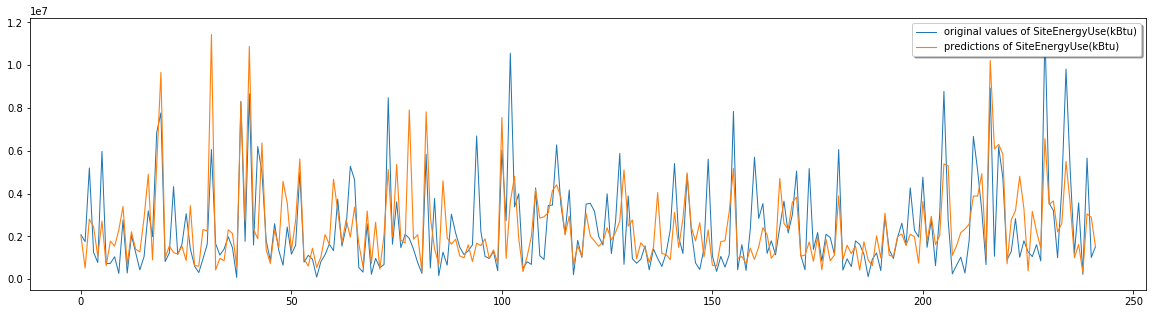

,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0031
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.4821,"1,487,589.4326",Ridge,2.8613
2,"{'alpha': 7811, 'fit_intercept': True}",0.4891,"1,478,533.3738",Lasso,0.0465
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.4748,"1,490,319.8859",ElasticNet,20.9918
4,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.4609,"1,454,179.5418",RandomForestRegressor,0.8867
5,"{'learning_rate': 0.2, 'max_depth': 25, 'n_est...",0.2785,"1,669,729.3649",XGBRegressor,2.6607


In [84]:
 
train_x=X_train.values
test_x=X_test.values
 
'''
param_grid = {
    'learning_rate':np.arange(0.1,1,0.1),
    'n_estimators':  np.arange(50, 110, 10),  #nombre d'arbres de décision 50
              'max_depth': np.arange(20, 50, 5)} #nombre maximum de niveaux dans chaque arbre de décision 20
# define the model/ estimator
'''

param_grid={'learning_rate':[ 0.2], 'max_depth': [25], 'n_estimators': [50]}
model = XGBRegressor(random_state=42)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result
 

In [85]:
result

{'best_params': {'learning_rate': 0.2, 'max_depth': 25, 'n_estimators': 50},
 'R2': 0.27854780028683435,
 'rmse': 1669729.3649143206,
 'model': 'XGBRegressor',
 'time_elapsed': 2.6606919179903343}

#### 2-2 <u>XGBoost avec ENERGYSTARScore </u>

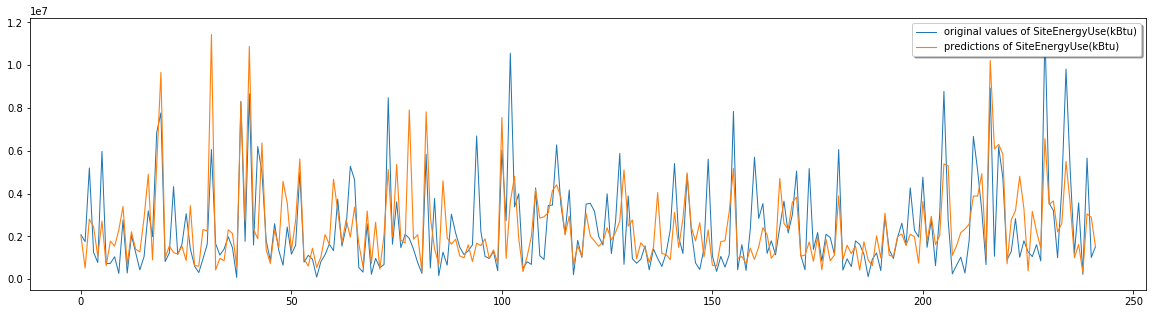

,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0067
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.4821,"1,487,589.4326",Ridge,2.2641
2,"{'alpha': 7811, 'fit_intercept': True}",0.4891,"1,478,533.3738",Lasso,0.0385
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.4748,"1,490,319.8859",ElasticNet,22.1748
4,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.4609,"1,454,179.5418",RandomForestRegressor,0.9227
5,"{'learning_rate': 0.2, 'max_depth': 25, 'n_est...",0.2785,"1,669,729.3649",XGBRegressor,2.6143


In [86]:
 
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 
# Fixer les valeurs des hyperparamètres à tester
param_grid={'learning_rate':[ 0.2], 'max_depth': [25], 'n_estimators': [50]}
scoring = 'r2'


# define the model/ estimator
model = XGBRegressor(random_state=42)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score


### 3 <u>AdaBoost</u>

#### 3-1 <u>Adaboost sans ENERGYSTARScore </u>

In [87]:
'''
    
     
train_x=X_train.values
test_x=X_test.values
 
 

param_grid = {'base_estimator': [Ridge(), 
                                  Lasso(),ElasticNet(),RandomForestRegressor(),XGBRegressor()],
            # 'learning_rate': [0.001, 0.01, 0.1, 1.0],
             #'n_estimators': [50, 100, 150, 200]
             }
model = AdaBoostRegressor(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result
'''

"\n    \n     \ntrain_x=X_train.values\ntest_x=X_test.values\n \n \n\nparam_grid = {'base_estimator': [Ridge(), \n                                  Lasso(),ElasticNet(),RandomForestRegressor(),XGBRegressor()],\n            # 'learning_rate': [0.001, 0.01, 0.1, 1.0],\n             #'n_estimators': [50, 100, 150, 200]\n             }\nmodel = AdaBoostRegressor(random_state=random_state)\nresult=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)\n\n\ndf_result=df_result.append(result,ignore_index = True)\ndf_result\n"

In [88]:
result

{'best_params': {'learning_rate': 0.2, 'max_depth': 25, 'n_estimators': 50},
 'R2': 0.27854780028683435,
 'rmse': 1669729.3649143206,
 'model': 'XGBRegressor',
 'time_elapsed': 2.6142949119675905}

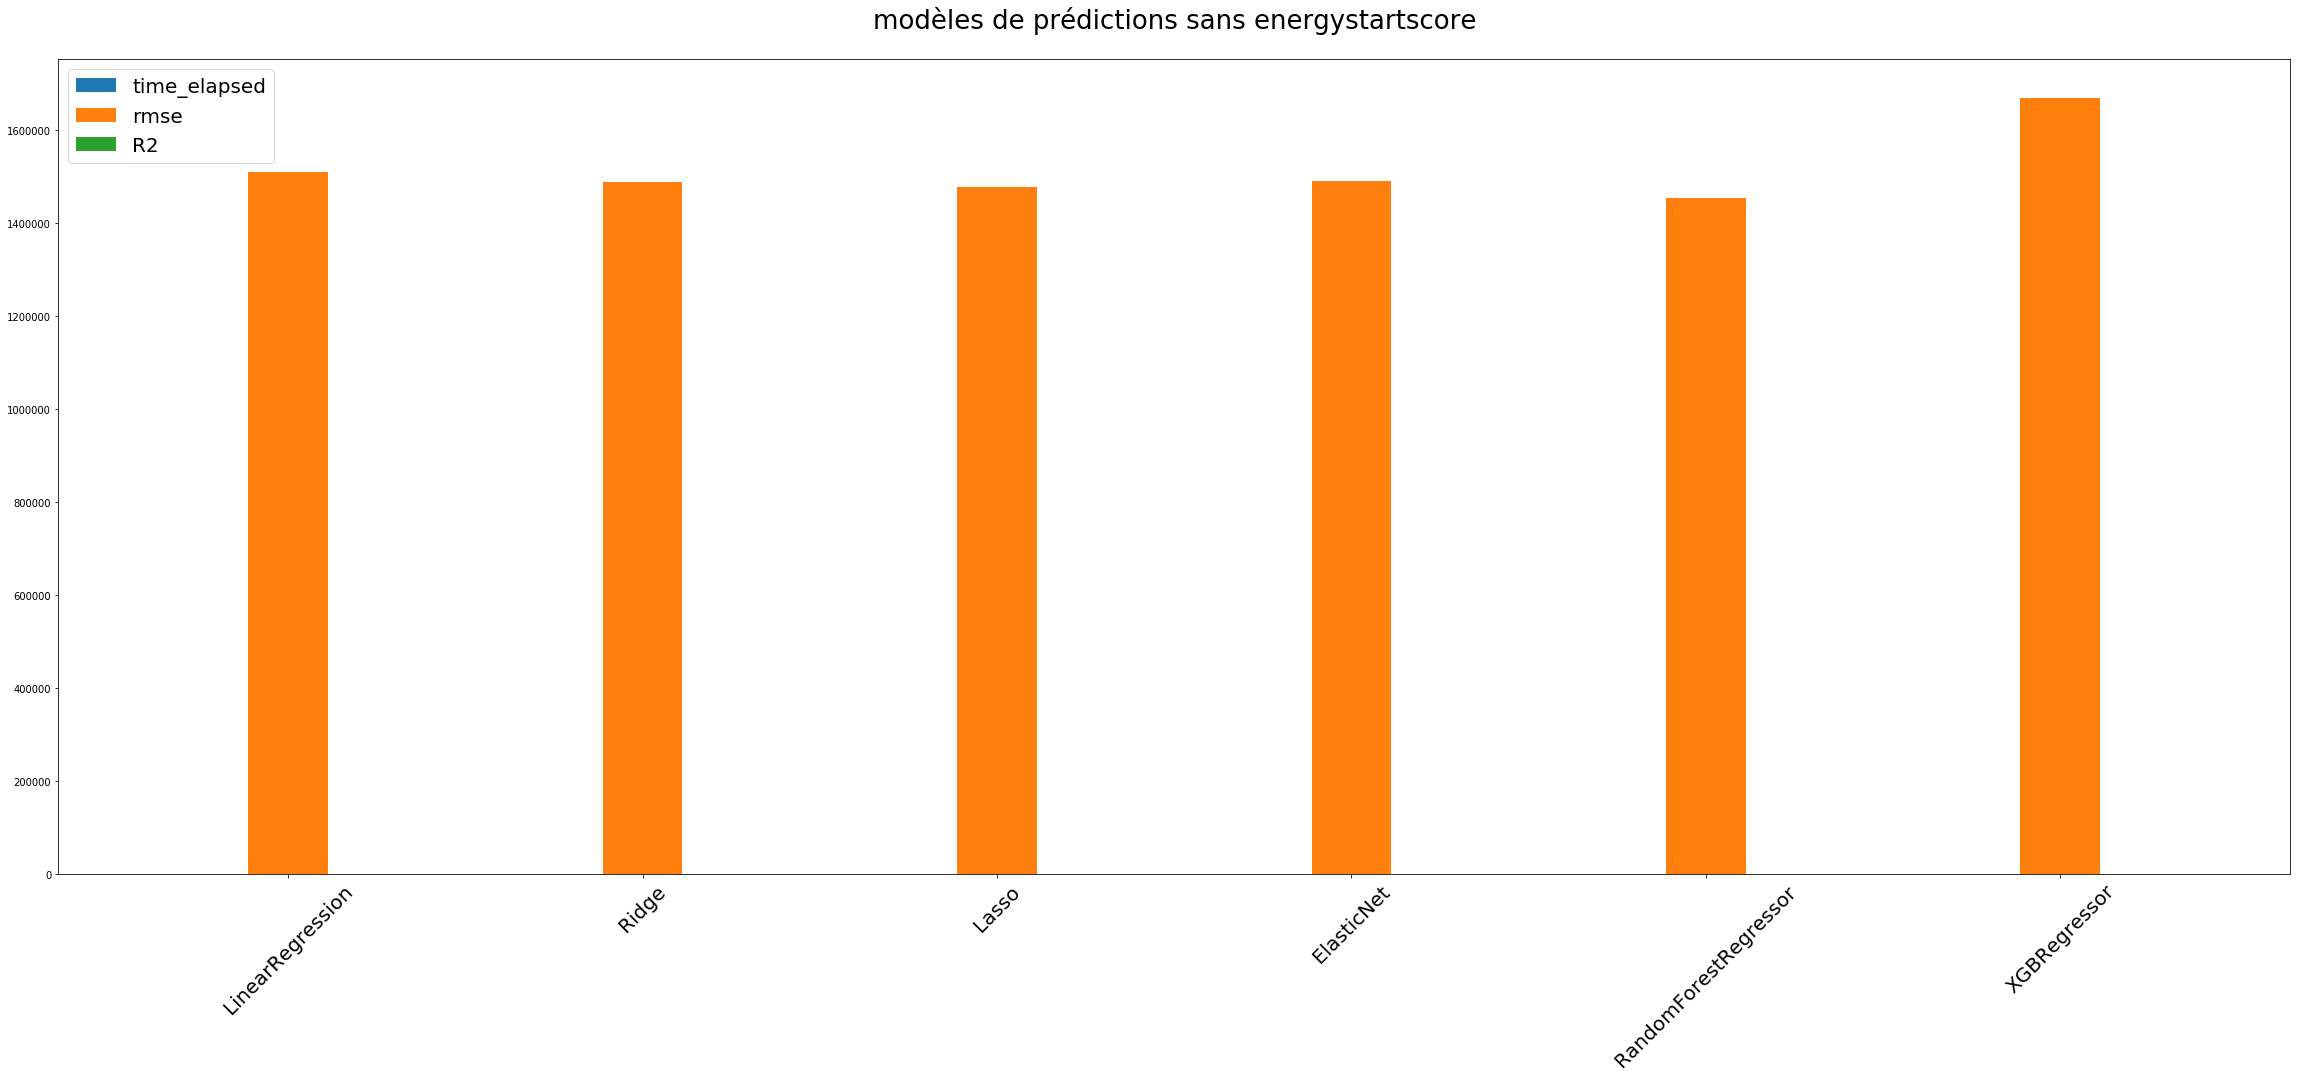

In [89]:
from sklearn.preprocessing import StandardScaler
Labels=df_result['model'].unique().tolist()
 
 
numeric_cols=['R2','rmse','time_elapsed']
fig, ax = plt.subplots(figsize=(40,15))
data_plot=df_result.copy()
data_plot['R2']=data_plot['R2']+200
data_plot['rmse']=data_plot['rmse']+200
 
utils.bar_plot(ax,data_plot[['time_elapsed','rmse','R2']], total_width=1.5, single_width=0.9)
plt.xticks(range(len(Labels)), Labels, fontsize=20, rotation=45)

ttl = plt.title("modèles de prédictions sans energystartscore", fontsize=26)
ttl.set_position([.5, 1.03])
plt.show()

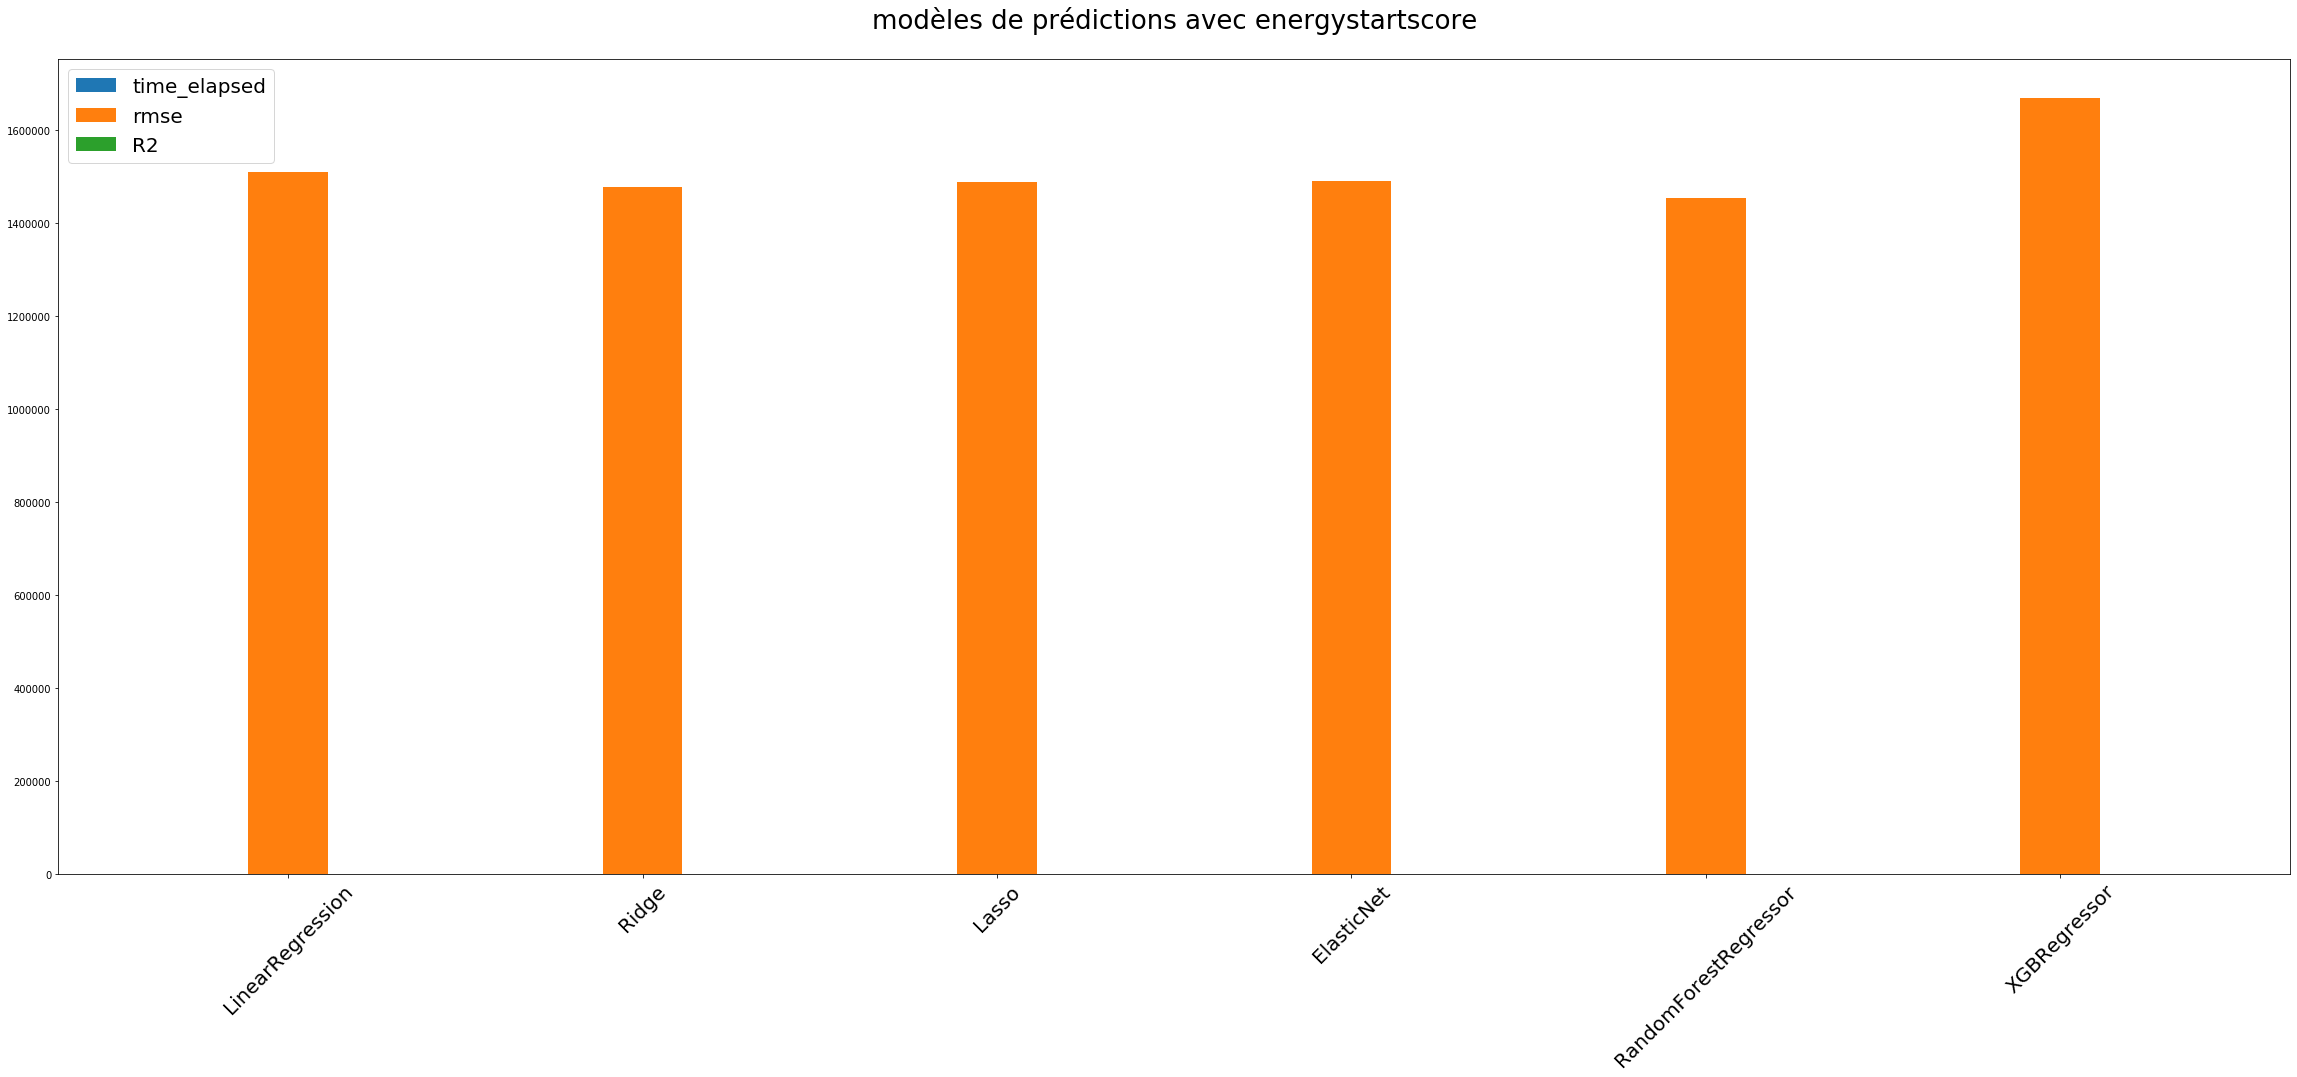

In [90]:
from sklearn.preprocessing import StandardScaler
Labels=df_result_with_energy_star_score['model'].unique().tolist()
 
 
numeric_cols=['R2','rmse','time_elapsed']
fig, ax = plt.subplots(figsize=(40,15))
data_plot=df_result_with_energy_star_score.copy()
data_plot['R2']=data_plot['R2']+200
data_plot['rmse']=data_plot['rmse']+200
 
utils.bar_plot(ax,data_plot[['time_elapsed','rmse','R2']].sort_values(ascending=False,by='R2'), total_width=1.5, single_width=0.9)
plt.xticks(range(len(Labels)), Labels, fontsize=20, rotation=45)

ttl = plt.title("modèles de prédictions avec energystartscore", fontsize=26)
ttl.set_position([.5, 1.03])
plt.show()

In [91]:
df_result

,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0031
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.4821,"1,487,589.4326",Ridge,2.8613
2,"{'alpha': 7811, 'fit_intercept': True}",0.4891,"1,478,533.3738",Lasso,0.0465
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.4748,"1,490,319.8859",ElasticNet,20.9918
4,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.4609,"1,454,179.5418",RandomForestRegressor,0.8867
5,"{'learning_rate': 0.2, 'max_depth': 25, 'n_est...",0.2785,"1,669,729.3649",XGBRegressor,2.6607


In [92]:
df_result_with_energy_star_score.sort_values(by='R2',ascending=False)

,best_params,R2,rmse,model,time_elapsed
0,None,0.5029,"1,509,393.1622",LinearRegression,0.0067
2,"{'alpha': 7811, 'fit_intercept': True}",0.4891,"1,478,533.3738",Lasso,0.0385
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.4821,"1,487,589.4326",Ridge,2.2641
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.4748,"1,490,319.8859",ElasticNet,22.1748
4,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.4609,"1,454,179.5418",RandomForestRegressor,0.9227
5,"{'learning_rate': 0.2, 'max_depth': 25, 'n_est...",0.2785,"1,669,729.3649",XGBRegressor,2.6143


In [93]:
'''


# Fixer les valeurs des hyperparamètres à tester
param_grid = { 'hidden_layer_sizes': [i for i in range(1,15)],
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['sgd', 'adam'],    #choose stochastic gradient descent function
              'alpha': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}#terme de régulation





train_x=X_train.values
test_x=X_test.values
 
model = MLPRegressor()
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result
'''

"\n\n\n# Fixer les valeurs des hyperparamètres à tester\nparam_grid = { 'hidden_layer_sizes': [i for i in range(1,15)],\n              'activation': ['identity', 'logistic', 'tanh', 'relu'],\n              'solver': ['sgd', 'adam'],    #choose stochastic gradient descent function\n              'alpha': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}#terme de régulation\n\n\n\n\n\ntrain_x=X_train.values\ntest_x=X_test.values\n \nmodel = MLPRegressor()\nresult=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)\n\n\ndf_result=df_result.append(result,ignore_index = True)\ndf_result\n"